
# Data Exploration and Preprocessing

We will use the Yelp Review dataset included in the "daily_weather.csv" file.
We will explore and then preprocess the dataset, dealing with missing values.


We start by reading the csv file into a dataframe (make sure to give the correct path when you run this). 

In [1]:
print(__doc__)

import numpy as np
import scipy as sp
import pandas as pd
import sys
from flask import Flask


from sklearn.preprocessing import Imputer
from sklearn.neighbors import NearestNeighbors


# Store the csv in a dataframe
df = pd.read_csv('/Users/ropatel/Desktop/book1.csv')




#items = pandas.read_csv('C:\\Users\Bassi\\Desktop\\testworks.csv', sep = '\t', 
      #  quoting = csv.QUOTE_NONE, names = ["time, type, business_id"])
                        



Automatically created module for IPython interactive environment


In [2]:
#print the contents of the dataframe

#print(items)

We observe that some of the cells have missing values, denoted as 'NaN'. Since it's impossible to see how many of those exist by visually exploring the dataset, we instead print out a total count of the non-empty cells for each attribute. 

In [3]:
df.count()

# NOTE: I just put in 0s for in the actual CSV file

Business_ID        20
Location           20
Positive_review    20
Stars              20
dtype: int64

We observce that indeed, most of the attributes have missing values. 

We can also view the summary statistics.

In [4]:
df.describe()

#or for an alternative view...
#df.describe().transpose() 


,Business_ID,Location,Positive_review,Stars
count,20.00000,20.000000,20.00000,20.000000
mean,10.50000,2.850000,34.05000,2.950000
std,5.91608,1.424411,26.35881,1.503505
min,1.00000,1.000000,1.00000,1.000000
25%,5.75000,2.000000,13.50000,2.000000
50%,10.50000,3.000000,22.50000,3.000000
75%,15.25000,4.000000,56.00000,4.250000
max,20.00000,5.000000,85.00000,5.000000



Time to do something about all these missing values.

Let's look closer at one variable, 'air_temp_9am':
 

In [5]:
#df.shape()


One approach is to drop the rows that contain the missing values.

(notice that in order to avoid messing up with our original dataframe, we save the resulting dataset in a new dataframe df2) 



In [6]:
#df2 = df.dropna(subset=['years'])

Now let's see the total number of rows.

In [7]:
#df2.count()

Now let's clear the entire data frame from missing values.

In [8]:
#df3 = df.dropna()
#df3.count()

How was the dataset affected by this? Let's look at the mean and standard deviation of the attributes. 

In [9]:
#df3.describe()

Imputation

An alternative approach to missing values is to impute them. 

The following snippet demonstrates how to replace missing values, encoded as np.nan, using the mean value of the column (axis 0) that contain the missing values.

In [10]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)

imputed_DF = pd.DataFrame(imp.fit_transform(df))
imputed_DF.columns = df.columns
imputed_DF.index = df.index

Now let's see how much did the attributes' stats change...

In [11]:
# STILL NEED TO DO:

# This will fill in the missing values in the CSV, so we somehow need to use this imputed dataframe to work with for the 
# rest of the code

#imputed_DF.describe()
imputed_DF

,Business_ID,Location,Positive_review,Stars
0,1.0,2.0,50.0,3.0
1,2.0,3.0,1.0,2.0
2,3.0,2.0,6.0,5.0
3,4.0,5.0,15.0,1.0
4,5.0,1.0,85.0,5.0
5,6.0,4.0,12.0,3.0
6,7.0,2.0,65.0,5.0
7,8.0,3.0,12.0,4.0
8,9.0,5.0,45.0,1.0
9,10.0,1.0,10.0,2.0


In [12]:
#n_stuff = df.Business_ID.unique().shape[0]
#print ("Numer of bussiness ids: " + str(n_stuff))



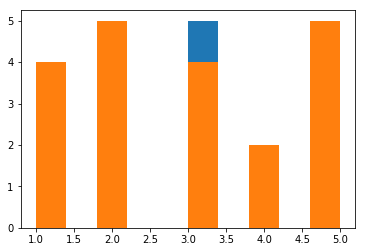

In [13]:
import matplotlib.pyplot as plt

# Show the layout for the location column, I did this just to see what it looks like (Note: we can show all the column values) 
plt.hist(imputed_DF["Location"])
plt.hist(imputed_DF["Stars"])

plt.show()

In [14]:
from sklearn.cluster import KMeans

# Set the clusters = 5
kmeans_model = KMeans(n_clusters=5, random_state=1)

# good_columns = df._get_numberic_data()
# Fit the model with the dataframe df
kmeans_model.fit(df)

#Get the cluster assignments
labels = kmeans_model.labels_



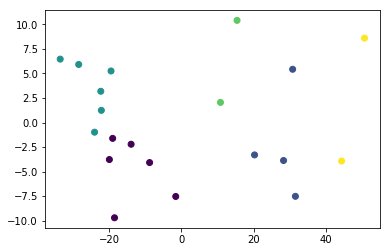

In [15]:
#############just coloumn

from sklearn.decomposition import PCA
# Reduce the dimensionality of data without losing data
# Use Principal Component Analysis to accomplish
pca_2 = PCA(2)

# Fit the PCA model with the dataframe
plot_columns = pca_2.fit_transform(df)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.show()


In [16]:
# Show the columns that have a strong correlation to the NEW_location_TEST (We might not need to do this for our project, 
# since, we are using the reviews, stars, and locations as our columns)
#df.corr()["NEW_location_TEST"]

In [17]:
# This just gets the columns that we need, and removes the one we don't (i.e. only use location, reviews, and starts)
columns = df.columns.tolist()
columns = [c for c in columns if c not in ["Business_ID"]]

#Print out the contents 
columns


['Location', 'Positive_review', 'Stars']

In [18]:
# create new csv file and show test data
#Right now I am only using target="NEW_location_TEST" as the target variable which is what we will predict to
target = "NEW_location_TEST"

# This is what we actually need to set it to, so basically just cross out target="NEW_location_TEST" and put target = "NEW_stars")
target1 = "NEW_stars"


In [19]:
from sklearn.model_selection import train_test_split

# Train our dataset. It is split up into 80% training and 20% testing
train = imputed_DF.sample(frac=0.8, random_state=1)

# TO DO: df.dropna() business id ...........................
train1 = df.sample(frac=0.5, random_state=1)
train2 = df.sample(frac=0.9, random_state=1)

# This line of code just gets whatever is not in the training set (i.e. 20%)
test = df.loc[~df.index.isin(train.index)]
test1 = df.loc[~df.index.isin(train1.index)]
test2 = df.loc[~df.index.isin(train2.index)]

# Print out the training set. (16, 6) means 16 rows and 6 columns (80%)
print(train.shape)

# Print out the test set. (4,6) means 4 rows and 6 columns (20%)
print(test.shape)

print(train1.shape)

print(test1.shape)

print(train2.shape)

print(test2.shape)

(16, 4)
(4, 4)
(10, 4)
(10, 4)
(18, 4)
(2, 4)


In [20]:
# Print out the actual contents of the training set
train

# from flask import Flask
# app = Flask(__name__)

# @app.route("/")
# def hello():
#     return "test2.shape"

# if __name__ == "__main__":
#     app.run()




,Business_ID,Location,Positive_review,Stars
3,4.0,5.0,15.0,1.0
16,17.0,2.0,78.0,2.0
6,7.0,2.0,65.0,5.0
10,11.0,5.0,15.0,3.0
2,3.0,2.0,6.0,5.0
14,15.0,2.0,54.0,3.0
4,5.0,1.0,85.0,5.0
17,18.0,3.0,32.0,4.0
7,8.0,3.0,12.0,4.0
1,2.0,3.0,1.0,2.0


In [21]:
# Print out the actual contents of the test set
test

,Business_ID,Location,Positive_review,Stars
5,6,4,12,3
8,9,5,45,1
11,12,4,20,5
12,13,5,14,1


In [22]:
train1

,Business_ID,Location,Positive_review,Stars
3,4,5,15,1
16,17,2,78,2
6,7,2,65,5
10,11,5,15,3
2,3,2,6,5
14,15,2,54,3
4,5,1,85,5
17,18,3,32,4
7,8,3,12,4
1,2,3,1,2


In [23]:
test1

,Business_ID,Location,Positive_review,Stars
0,1,2,50,3
5,6,4,12,3
8,9,5,45,1
9,10,1,10,2
11,12,4,20,5
12,13,5,14,1
13,14,1,25,2
15,16,3,62,2
18,19,1,15,1
19,20,3,65,5


In [24]:
train2

,Business_ID,Location,Positive_review,Stars
3,4,5,15,1
16,17,2,78,2
6,7,2,65,5
10,11,5,15,3
2,3,2,6,5
14,15,2,54,3
4,5,1,85,5
17,18,3,32,4
7,8,3,12,4
1,2,3,1,2


In [25]:
test2

,Business_ID,Location,Positive_review,Stars
5,6,4,12,3
11,12,4,20,5


In [26]:
# We will use linear regressiong model to predict for our target variable
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()
model1 = LinearRegression()
model2 = LinearRegression()

# Fit the linear regression model with the training set (Note: columns = "reviews, location, stars"), target = "NEW_location_test"
model.fit(train[columns], train[target])
model1.fit(train1[columns], train1[target])
model2.fit(train2[columns], train2[target])


KeyError: 'NEW_location_TEST'

In [ ]:
from sklearn.metrics import mean_squared_error
# Now call predict on the trained model and pass in the test set
predictions = model.predict(test[columns]) #three different cases 80%
predictions1 = model1.predict(test1[columns]) #three different cases 50%
predictions2 = model2.predict(test2[columns])  #three different cases

# This shows the 4 outputs for the NEW_location_TEST column
print("Linear Regression output for first model is:\n", predictions)
plt.plot(predictions)
plt.show()

#TO DO: put range case statements so we can assign stars accordingly

#mean_squared_error(predictions, test[columns])

In [ ]:
print("Linear Regression output for second model is:\n", predictions1)
plt.plot(predictions1)
plt.show()

In [ ]:
print("Linear Regression output for third model is:\n", predictions2)
plt.plot(predictions2)
plt.show()

In [ ]:
#Print out the mean squared error
mean_squared_error(predictions, test[target])
mean_squared_error(predictions1, test1[target])
mean_squared_error(predictions2, test2[target])


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfmodel = RandomForestRegressor(n_estimators=10, min_samples_leaf=10, random_state=1)
rfmodel1 = RandomForestRegressor(n_estimators=100, min_samples_leaf=20, random_state=1)
rfmodel2 = RandomForestRegressor(n_estimators=50, min_samples_leaf=5, random_state=1)

rfmodel.fit(train[columns], train[target])
rfmodel1.fit(train1[columns], train1[target])
rfmodel2.fit(train2[columns], train2[target])

rfpredictions = rfmodel.predict(test[columns])
rfpredictions1 = rfmodel1.predict(test1[columns])
rfpredictions2 = rfmodel2.predict(test2[columns])

print("Random Forest for first model output is:\n", rfpredictions)
plt.plot(rfpredictions)
plt.show()


In [ ]:
print("Random Forest for second model output is:\n", rfpredictions1)
plt.plot(rfpredictions1)
plt.show()

In [ ]:
print("Random Forest for third model output is:\n", rfpredictions2)
plt.plot(rfpredictions2)
plt.show()

In [ ]:
mean_squared_error(rfpredictions, test[target])
mean_squared_error(rfpredictions1, test1[target])
mean_squared_error(rfpredictions2, test2[target])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=3, metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=1, p=2,
                     weights='uniform')
knn1 = KNeighborsClassifier(algorithm='auto', leaf_size=4, metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=2, p=2,
                     weights='uniform')
knn2 = KNeighborsClassifier(algorithm='auto', leaf_size=5, metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=3, p=2,
                     weights='uniform')



knn.fit(train[columns], train[target]) 
knn1.fit(train1[columns], train1[target]) 
knn2.fit(train2[columns], train2[target]) 

knnpredictions = knn.predict(test[columns])
knnpredictions1 = knn1.predict(test1[columns])
knnpredictions2 = knn2.predict(test2[columns])


# This shows the 4 outputs for the NEW_location_TEST column
print("KNN Regression output for first model is:\n", knnpredictions)
plt.plot(knnpredictions)
plt.show()



In [ ]:
print("KNN Regression output for second model is:\n", knnpredictions1)
plt.plot(knnpredictions1)
plt.show()

In [ ]:
print("KNN Regression output for third model is:\n", knnpredictions2)
plt.plot(knnpredictions2)
plt.show()

In [ ]:
mean_squared_error(knnpredictions, test[target])
mean_squared_error(knnpredictions1, test1[target])
mean_squared_error(knnpredictions2, test2[target])